In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd



Loading and processing the training data

In [15]:
# load the csv file lab, display head to examine
train_file = 'train.csv'
train_csv = pd.read_csv(train_file)
# randomize dataframe rows to prepare for dividing into train/valid/test sets
data = train_csv.sample(frac = 1)
# display for a quick check
data.head()


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
293,485,Quercus_Nigra,0.011719,0.025391,0.027344,0.035156,0.003906,0.021484,0.005859,0.000000,...,0.002930,0.000000,0.046875,0.002930,0.021484,0.00000,0.0,0.000000,0.045898,0.002930
341,561,Populus_Grandidentata,0.007812,0.011719,0.126950,0.007812,0.005859,0.048828,0.007812,0.000000,...,0.022461,0.000000,0.017578,0.000000,0.002930,0.00000,0.0,0.011719,0.000977,0.064453
408,671,Viburnum_Tinus,0.025391,0.035156,0.027344,0.011719,0.003906,0.054688,0.046875,0.000000,...,0.000000,0.000977,0.016602,0.021484,0.040039,0.00000,0.0,0.015625,0.042969,0.010742
161,282,Populus_Nigra,0.017578,0.013672,0.058594,0.003906,0.009766,0.033203,0.046875,0.005859,...,0.032227,0.000000,0.013672,0.002930,0.030273,0.00000,0.0,0.002930,0.000000,0.011719
603,958,Quercus_Alnifolia,0.017578,0.029297,0.031250,0.005859,0.003906,0.037109,0.039062,0.003906,...,0.000000,0.000000,0.001953,0.011719,0.025391,0.00293,0.0,0.010742,0.003906,0.004883


In [16]:
#get the different species categories
categories = train_csv.species.unique()
#print the 1st 10 to verify
print "First 10 categories: ", categories[:10]
#print length of array to ensure 99 categories are there
print "Number of categories:", len(categories) 
print type(categories)

#convert string categories for training set into indices of the categories array
labels_dense = [np.where(i == categories)[0][0] for i in data.species]

#convert dense labels to one-hot-encoding
labels = np.eye(len(categories))[labels_dense]

First 10 categories:  ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis']
Number of categories: 99
<type 'numpy.ndarray'>


Split the data into training, test, and validation sets

In [24]:
# split into train/test datasets. 
# test here means my own private test set to get my own idea of the accuracy, not the given test set
train_length = int(len(data) * .8)

train_ = data[:train_length]
test_data = data[train_length:]
print("Total data: {} Training and validation examples: {} Test examples: {}".format(len(data), len(train_), len(test_data)))
train_l = labels[:train_length]
test_labels = labels[train_length:]
print("Total labels: {} Training and validation labels: {} Test labelss: {}".format(len(labels), len(train_l), len(test_labels)))

#further split training data and labels into training and validation sets

train_length = int(len(train_) * .8)

train_data = train_[:train_length]
valid_data = train_[train_length:]
print("Total Training and validation examples: {} Training examples: {} Validation examples: {}".format(len(train_), len(train_data), len(valid_data)))
train_labels = train_l[:train_length]
valid_labels = train_l[train_length:]
print("Total Training and validationl labels: {} Training labels: {} Validation labels: {}".format(len(train_l), len(train_labels), len(valid_labels)))
print("Shape of training labels: {}".format(train_labels.shape))

Total data: 990 Training and validation examples: 792 Test examples: 198
Total labels: 990 Training and validation labels: 792 Test labelss: 198
Total Training and validation examples: 792 Training examples: 633 Validation examples: 159
Total Training and validationl labels: 792 Training labels: 633 Validation labels: 159
Shape of training labels: (633, 99)


Now for the image data: I will grab the image for all the ids in the training and test set

In [25]:
images = []
for i in train_csv.id:
    images.append(cv2.imread('images/' + str(i) + ".jpg"))

   

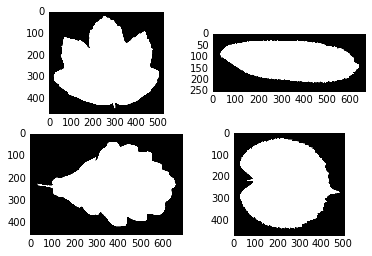

In [26]:
#visualize a few examples, visually verify with images in folder
fig = plt.figure()
counter = 1
for ima in images[:4]:
    a = fig.add_subplot(2,2, counter)
    plt.imshow(ima)
    counter +=1
    

Need to make all the images the same size to run a CNN. Since CNNs are location invariant, preserving image shape is more important than centering it or preserving its location. So I will add black pixeles to the top and right edges of the image matrices so that they are of uniform size.

In [ ]:
# get the max hight and width of all the images in the image dataset
